# 🧰 Task 1: Učitavanje i pregled podataka

# 📦 Online Retail Data Loading
Učitavanje velikog CSV fajla korišćenjem Pandas biblioteke.

In [7]:
import pandas as pd

# Učitavanje fajla
df = pd.read_csv('../data/online_retail.csv', encoding='ISO-8859-1')

# Prikaz prvih 5 redova
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [8]:
# Informacije o kolonama i null vrednostima
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
# Opis statistike
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [10]:
# Nedostajuće vrednosti po kolonama
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# Uklanjamo sve redove koji imaju makar jednu null vrednost
df_clean = df.dropna()

# Proveri dimenzije pre i posle
print(f"Original shape: {df.shape}")
print(f"After dropna(): {df_clean.shape}")

Original shape: (541909, 8)
After dropna(): (406829, 8)


# Uklanjamo sve redove koji imaju makar jednu null vrednost
df_clean = df.dropna()

# Proveri dimenzije pre i posle
print(f"Original shape: {df.shape}")
print(f"After dropna(): {df_clean.shape}")

## 🧹 Task 2: Čišćenje podataka

# Uklanjamo sve redove koji imaju makar jednu null vrednost
df_clean = df.dropna()

# Proveri dimenzije pre i posle
print(f"Original shape: {df.shape}")
print(f"After dropna(): {df_clean.shape}")

In [12]:
# Uklanjamo redove sa negativnim ili nultim količinama i cenama
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Provera
df_clean.describe()


Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

In [13]:
# Dodavanje nove kolone sa ukupnom vrednošću transakcije
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Prikaz za proveru
df_clean[['InvoiceNo', 'Description', 'Quantity', 'UnitPrice', 'TotalPrice']].head()


InvoiceNo                          Description  Quantity  UnitPrice  \
0    536365   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55   
1    536365                  WHITE METAL LANTERN         6       3.39   
2    536365       CREAM CUPID HEARTS COAT HANGER         8       2.75   
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39   
4    536365       RED WOOLLY HOTTIE WHITE HEART.         6       3.39   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [15]:
# Resetovanje indeksa nakon filtriranja
df_clean.reset_index(drop=True, inplace=True)


## 📊 Task 3: Eksplorativna analiza podataka (EDA)


In [19]:
# Grupisanje po proizvodima (Description) i sabiranje ukupne prodaje
top_products = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Prikaz
top_products


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64

In [20]:
# Grupisanje po zemljama i sabiranje ukupne vrednosti kupovina
country_sales = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# Prikaz 10 zemalja osim UK (UK je dominantan pa ga često izbacujemo)
country_sales.drop('United Kingdom').head(10)


Country
Netherlands    285446.34
EIRE           265545.90
Germany        228867.14
France         209024.05
Australia      138521.31
Spain           61577.11
Switzerland     56443.95
Belgium         41196.34
Sweden          38378.33
Japan           37416.37
Name: TotalPrice, dtype: float64

In [21]:
# Pretvori kolonu 'InvoiceDate' u datetime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Dodaj nove kolone za analizu vremena
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour
df_clean['Weekday'] = df_clean['InvoiceDate'].dt.day_name()

# Prikaz da proveriš
df_clean[['InvoiceDate', 'Year', 'Month', 'Day', 'Hour', 'Weekday']].head()


InvoiceDate  Year  Month  Day  Hour    Weekday
0 2010-12-01 08:26:00  2010     12    1     8  Wednesday
1 2010-12-01 08:26:00  2010     12    1     8  Wednesday
2 2010-12-01 08:26:00  2010     12    1     8  Wednesday
3 2010-12-01 08:26:00  2010     12    1     8  Wednesday
4 2010-12-01 08:26:00  2010     12    1     8  Wednesday

In [22]:
# Ukupna prodaja po mesecima
monthly_sales = df_clean.groupby('Month')['TotalPrice'].sum()

# Prikaz
monthly_sales


Month
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12    1090906.680
Name: TotalPrice, dtype: float64

In [23]:
# Po danima (da li se više kupuje ponedeljkom, petkom, itd.)
weekday_sales = df_clean.groupby('Weekday')['TotalPrice'].sum()

# Redosled dana (jer Pandas sortira po alfabetu)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(ordered_days)

weekday_sales


Weekday
Monday       1367146.411
Tuesday      1700634.631
Wednesday    1588336.170
Thursday     1976859.070
Friday       1485917.401
Saturday             NaN
Sunday        792514.221
Name: TotalPrice, dtype: float64

## 🎨 Vizualizaciju podataka – Task 4: Grafici i prikazi

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stil za lepši izgled grafika
sns.set(style='whitegrid')


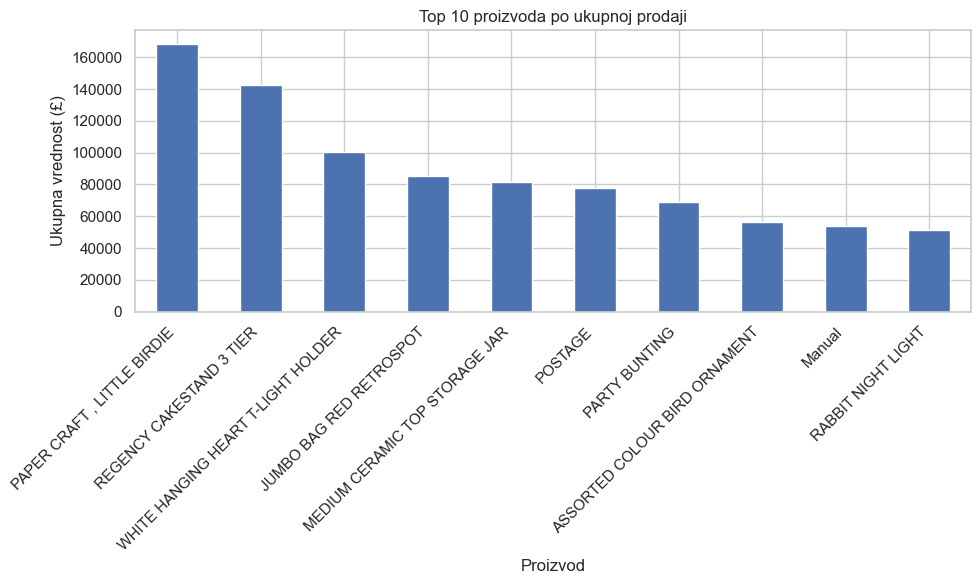

In [25]:
# Bar chart za top 10 proizvoda
plt.figure(figsize=(10,6))
top_products.plot(kind='bar')
plt.title('Top 10 proizvoda po ukupnoj prodaji')
plt.ylabel('Ukupna vrednost (£)')
plt.xlabel('Proizvod')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


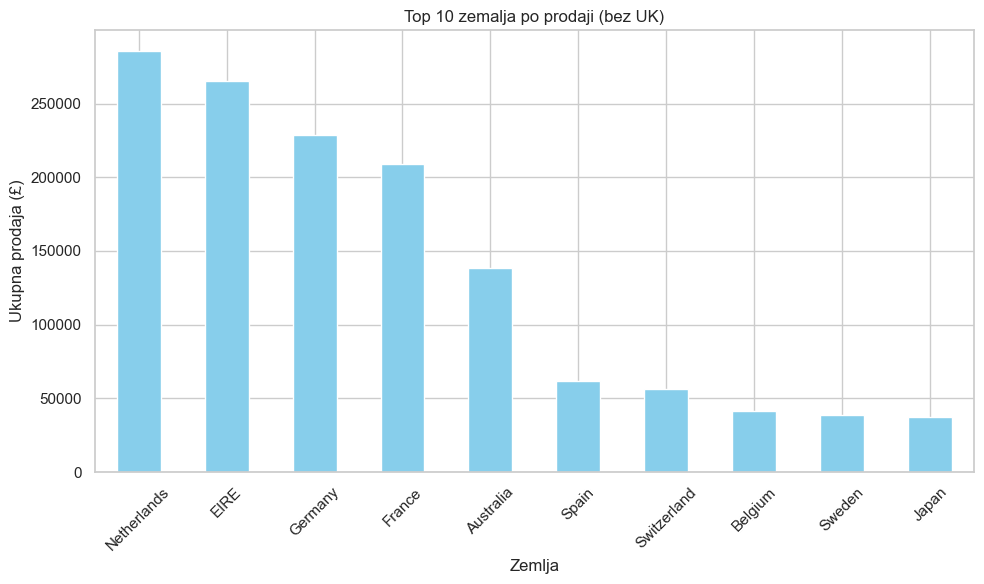

In [26]:
plt.figure(figsize=(10,6))
country_sales.drop('United Kingdom').head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 zemalja po prodaji (bez UK)')
plt.ylabel('Ukupna prodaja (£)')
plt.xlabel('Zemlja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


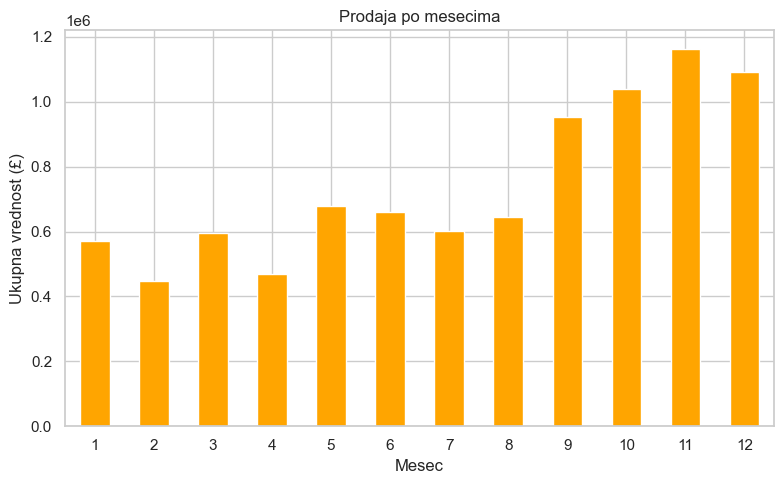

In [27]:
plt.figure(figsize=(8,5))
monthly_sales.plot(kind='bar', color='orange')
plt.title('Prodaja po mesecima')
plt.xlabel('Mesec')
plt.ylabel('Ukupna vrednost (£)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


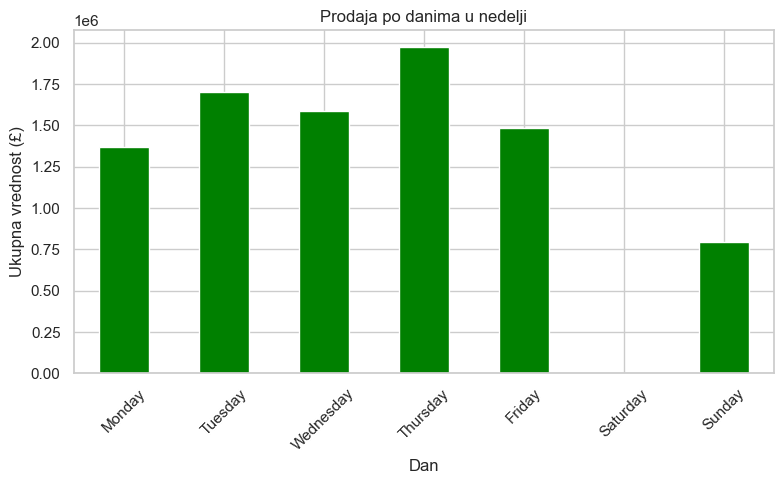

In [28]:
plt.figure(figsize=(8,5))
weekday_sales.plot(kind='bar', color='green')
plt.title('Prodaja po danima u nedelji')
plt.xlabel('Dan')
plt.ylabel('Ukupna vrednost (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📦 Task 5: Završni koraci – dokumentacija i spremanje projekta za GitHub / CV

## ✅ Zaključak

Analizom podataka online prodavnice došli smo do sledećih zaključaka:

- Najprodavaniji proizvodi su dekorativni predmeti, posebno oko praznika
- Velika većina kupaca dolazi iz UK, ali i druge zemlje (npr. Nemačka, Holandija) beleže značajne vrednosti prodaje
- Najveći promet se beleži u novembru i decembru, što ukazuje na sezonsku špicu (praznični period)
- Kupovina se najviše obavlja radnim danima, posebno utorkom i četvrtkom

Ova analiza može pomoći menadžmentu da optimizuje zalihu, planira marketing kampanje i segmentira tržišta.
